<a href="https://colab.research.google.com/github/mvm1964/MGVB/blob/main/danone_ANN_loo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")
print(f"Using {device} device")

Using cpu device


In [3]:
# prompt: create a torch neural net class with two hided layers and a single continuous node in the output layer

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, hidden_size4):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, hidden_size1),
            nn.ReLU(),
            nn.Linear(hidden_size1, hidden_size2),
            nn.ReLU(),
            nn.Linear(hidden_size2, hidden_size3),
            nn.ReLU(),
            nn.Linear(hidden_size3, hidden_size4),
            nn.ReLU(),
            nn.Linear(hidden_size4, 1) # Single continuous output node
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


In [4]:
# prompt: create pandas dataframe with 20 continuous columns and 1000 rows filled with random numbers from 0 to 1

import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

# Create a DataFrame with 20 continuous columns and 1000 rows
#data = np.random.rand(1000, 20)
#df = pd.DataFrame(data)

df = pd.read_csv('/content/drive/My Drive/rf_data_ingredients.csv')
#df = pd.get_dummies(df.drop('barcode', axis=1), dtype=int)
df = pd.get_dummies(df, dtype=int)
df


Mounted at /content/drive


,new_ingr_data.avg_h,GOS.SYRUP,SUNFLOWER.OIL..HIGH.OLEIC.ACID.,CITRIC.ACID,SKIMMED.MILK.CONCENTRATE.26..NON.SEASONAL,STARCH.POTATO.FRACTION..IMPROVED,VITAMIN.A.PALMITATE,LACTOSE.EDIBLE.LOW.VIT.B2,CHOLINE.CHLORIDE,CALCIUM.CARBONATE.FINE,...,LACTOSE.EDIBLE.VITAMIN.B2,VITAMIN.B6..PIRIDOXIN.HYDROCHLORIDE.100..,COPPER.SULPHATE.PENTAHYDRATE,new_ingr_data.Supply.point_FULDA,new_ingr_data.Supply.point_HAPS,new_ingr_data.Supply.point_MCR1,new_ingr_data.Supply.point_MCR2,new_ingr_data.Supply.point_OPO,new_ingr_data.Supply.point_STV,new_ingr_data.Supply.point_WXF
0,10.000000,12.500000,1.546670,0.000014,48.645120,0.000,0.001145,10.867080,0.159882,0.200342,...,0.0,0.000317,0.000000,1,0,0,0,0,0,0
1,31.666667,11.931231,0.369676,0.000032,70.788155,0.000,0.001417,20.818125,0.174619,0.264260,...,0.0,0.000355,0.000000,1,0,0,0,0,0,0
2,35.185185,12.253610,1.261299,0.000044,95.458320,0.000,0.001460,16.195573,0.198971,0.251635,...,0.0,0.000353,0.000000,1,0,0,0,0,0,0
3,50.076336,7.354657,12.007250,0.000000,62.346861,0.000,0.001182,21.587329,0.205011,0.000000,...,0.0,0.000511,0.000000,1,0,0,0,0,0,0
4,35.000000,0.000000,3.337473,0.000000,0.000000,0.000,0.001253,0.000000,0.217177,0.000000,...,0.0,0.000358,0.000000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,20.000000,7.354657,12.007250,0.000242,0.000000,0.000,0.001182,21.587329,0.205011,0.000000,...,0.0,0.000511,0.003214,0,0,0,0,0,0,1
160,0.000000,0.000000,0.000000,0.004982,0.000000,32.927,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.050606,0,0,0,0,0,0,1
161,0.000000,0.000000,0.000000,0.004510,0.000000,21.781,0.000000,0.000000,0.000000,0.000000,...,0.0,0.133871,0.025234,0,0,0,0,0,0,1
162,30.000000,16.539057,5.308996,0.000920,0.000000,0.000,0.001532,6.199546,0.035981,0.367103,...,0.0,0.000735,0.000000,0,0,0,0,0,0,1


In [57]:
model = NeuralNetwork(input_size=66, hidden_size1=66, hidden_size2=32, hidden_size3=16, hidden_size4=8).to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=66, out_features=66, bias=True)
    (1): ReLU()
    (2): Linear(in_features=66, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=8, bias=True)
    (7): ReLU()
    (8): Linear(in_features=8, out_features=1, bias=True)
  )
)


In [58]:
# Read data, convert to NumPy arrays
X = df.iloc[:, 1:68].values
y = df.iloc[:, 0].values

#device = torch.device("cpu")

# convert into PyTorch tensors
X = torch.tensor(X, dtype=torch.float32, device=device)
y = torch.tensor(y, dtype=torch.float32, device=device).reshape(-1, 1)

# create DataLoader, then take one batch
#loader = DataLoader(list(zip(X,y)), shuffle=True, batch_size=8)



In [95]:
import torch.optim as optim
from sklearn.model_selection import train_test_split
# train-test split for evaluation of the model
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, shuffle=True, random_state=123)

# set up DataLoader for training set
loader = DataLoader(list(zip(X_train, y_train)), shuffle=True, batch_size=16)


In [96]:
# train
n_epochs = 300
loss_fn = nn.MSELoss()
#optimizer = optim.SGD(model.parameters(), lr=0.1)
optimizer = optim.Adam(model.parameters(), lr=0.00001)
model.train()
for epoch in range(n_epochs):
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# evaluate accuracy after training
model.eval()
y_pred = model(X_test)



In [97]:
from sklearn.metrics import r2_score
y_t = y_test.cpu()
y_p = y_pred.cpu()
r2 = r2_score(y_t.detach().numpy(), y_p.detach().numpy())
print("R^2 score: %.2f" % r2)

#acc = (y_pred.round() == y_test).float().mean()
#acc = float(acc)
#print("Model accuracy: %.2f%%" % (acc*100))

R^2 score: 0.98


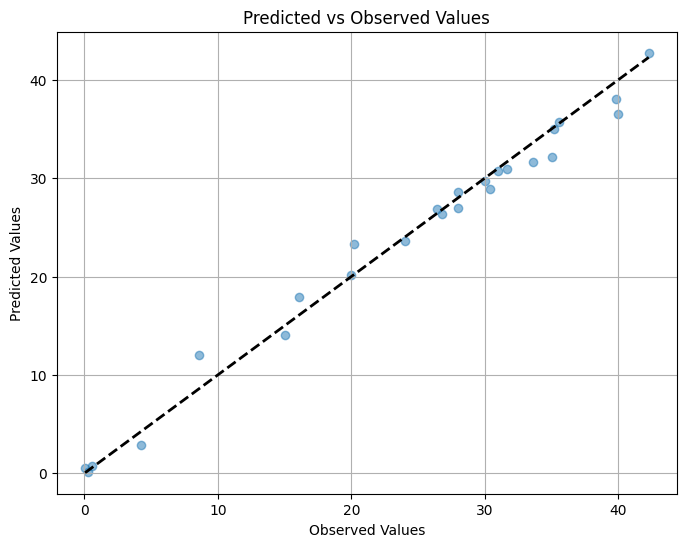

In [98]:
# prompt: plot predicted versus observed values of the above ANN model and save the plot to png file on Drive

import matplotlib.pyplot as plt

# Assuming y_t and y_p are already defined from the previous code
plt.figure(figsize=(8, 6))
plt.scatter(y_t.detach().numpy(), y_p.detach().numpy(), alpha=0.5)
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Observed Values')
plt.plot([y_t.min(), y_t.max()], [y_t.min(), y_t.max()], 'k--', lw=2) # Add a diagonal line
plt.grid(True)

# Save the plot to Google Drive
#plt.savefig('/content/drive/My Drive/CUDA/foam_height_predicted_vs_observed_correct_70split242split.png')

plt.show()


In [ ]:
# prompt: save model for use later

# Save the model's state_dict()
torch.save(model.state_dict(), '/content/drive/My Drive/CUDA/danone_my_model.pth')

# Later, to load the model:
# model = NeuralNetwork(input_size=65, hidden_size1=7, hidden_size2=7, hidden_size3=7, hidden_size4=7).to(device)
# model.load_state_dict(torch.load('/content/drive/My Drive/CUDA/my_model.pth'))
# model.eval()


In [102]:
# prompt: execute 5-fold crossvalidation of model

from sklearn.model_selection import KFold
import numpy as np

# Assuming X and y are your data and labels
# X and y should be numpy arrays or lists
kf = KFold(n_splits=5, shuffle=True, random_state=123) # Define the KFold object
r2_scores = []

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {fold+1}")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Convert to PyTorch tensors for each fold
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device).reshape(-1, 1)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32, device=device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32, device=device).reshape(-1, 1)

    # Create a new model instance for each fold
    model = NeuralNetwork(input_size=66, hidden_size1=66, hidden_size2=32, hidden_size3=16, hidden_size4=8).to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.00001) # Re-initialize optimizer

    # Training loop for the current fold
    model.train()
    for epoch in range(n_epochs):
        # Use DataLoader with tensors for the current fold
        loader = DataLoader(list(zip(X_train_tensor, y_train_tensor)), shuffle=True, batch_size=16)
        for X_batch, y_batch in loader:
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Evaluate on the test set for the current fold
    model.eval()
    y_pred = model(X_test_tensor)
    y_t = y_test_tensor.cpu()
    y_p = y_pred.cpu()

    r2 = r2_score(y_t.detach().numpy(), y_p.detach().numpy())
    r2_scores.append(r2)
    print(f"R^2 score for fold {fold+1}: {r2}")

print(f"Mean R^2 score across all folds: {np.mean(r2_scores)}")



Fold 1


<ipython-input-102-e8b02554dc92>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=device)
<ipython-input-102-e8b02554dc92>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device).reshape(-1, 1)
<ipython-input-102-e8b02554dc92>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test_tensor = torch.tensor(X_test, dtype=torch.float32, device=device)
<ipython-input-102-e8b02554dc92>:20: UserWarning: To copy

R^2 score for fold 1: -1.7057170867919922
Fold 2


<ipython-input-102-e8b02554dc92>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=device)
<ipython-input-102-e8b02554dc92>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device).reshape(-1, 1)
<ipython-input-102-e8b02554dc92>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test_tensor = torch.tensor(X_test, dtype=torch.float32, device=device)
<ipython-input-102-e8b02554dc92>:20: UserWarning: To copy

R^2 score for fold 2: -1.0455377101898193
Fold 3


<ipython-input-102-e8b02554dc92>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=device)
<ipython-input-102-e8b02554dc92>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device).reshape(-1, 1)
<ipython-input-102-e8b02554dc92>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test_tensor = torch.tensor(X_test, dtype=torch.float32, device=device)
<ipython-input-102-e8b02554dc92>:20: UserWarning: To copy

R^2 score for fold 3: -1.142322301864624
Fold 4


<ipython-input-102-e8b02554dc92>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=device)
<ipython-input-102-e8b02554dc92>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device).reshape(-1, 1)
<ipython-input-102-e8b02554dc92>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test_tensor = torch.tensor(X_test, dtype=torch.float32, device=device)
<ipython-input-102-e8b02554dc92>:20: UserWarning: To copy

R^2 score for fold 4: -1.8703441619873047
Fold 5


<ipython-input-102-e8b02554dc92>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=device)
<ipython-input-102-e8b02554dc92>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device).reshape(-1, 1)
<ipython-input-102-e8b02554dc92>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test_tensor = torch.tensor(X_test, dtype=torch.float32, device=device)
<ipython-input-102-e8b02554dc92>:20: UserWarning: To copy

R^2 score for fold 5: -0.8063271045684814
Mean R^2 score across all folds: -1.3140496730804443


In [108]:
# Leave one out crossvalidation
pred = []
for i in range(len(df)):
  df_tmp = df.drop(i)

  X = df_tmp.iloc[:, 1:68].values
  y = df_tmp.iloc[:, 0].values

  #device = torch.device("cpu")

  # convert into PyTorch tensors
  X = torch.tensor(X, dtype=torch.float32, device=device)
  y = torch.tensor(y, dtype=torch.float32, device=device).reshape(-1, 1)

  #X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=True, random_state=42)
  X_train = X
  y_train = y
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)
  y_test = df.iloc[i, 0].reshape(1, -1)

  # set up DataLoader for training set
  loader = DataLoader(list(zip(X_train, y_train)), shuffle=True, batch_size=16)

  n_epochs = 300
  loss_fn = nn.MSELoss()
  #optimizer = optim.SGD(model.parameters(), lr=0.1)
  optimizer = optim.Adam(model.parameters(), lr=0.00001)
  model.train()
  for epoch in range(n_epochs):
      for X_batch, y_batch in loader:
          y_pred = model(X_batch)
          loss = loss_fn(y_pred, y_batch)
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

  # evaluate accuracy after training
  model.eval()
  pred_tmp = model(X_test)
  pred_tmp_1 = pred_tmp.cpu()
  pred.append(pred_tmp_1.detach().numpy())
  print(f"Finished iteration {i}\npred = {pred[i]}, obs = {df.iloc[i, 0]}.")





<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 0
pred = [[22.948816]], obs = 10.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 1
pred = [[29.702911]], obs = 31.6666666666667.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 2
pred = [[35.486973]], obs = 35.1851851851852.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 3
pred = [[36.766193]], obs = 50.0763358778626.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 4
pred = [[23.677101]], obs = 35.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 5
pred = [[41.91807]], obs = 47.5.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 6
pred = [[44.758846]], obs = 52.4324324324324.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 7
pred = [[44.540386]], obs = 48.6666666666667.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 8
pred = [[36.403336]], obs = 35.5555555555556.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 9
pred = [[42.070316]], obs = 51.1111111111111.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 10
pred = [[30.481852]], obs = 35.0980392156863.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 11
pred = [[32.991653]], obs = 39.1071428571429.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 12
pred = [[47.70544]], obs = 43.8095238095238.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 13
pred = [[26.287004]], obs = 25.1388888888889.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 14
pred = [[33.051807]], obs = 46.6666666666667.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 15
pred = [[38.972588]], obs = 43.75.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 16
pred = [[49.862278]], obs = 45.8823529411765.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 17
pred = [[34.03013]], obs = 50.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 18
pred = [[36.137516]], obs = 52.8125.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 19
pred = [[36.1118]], obs = 24.2105263157895.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 20
pred = [[39.34979]], obs = 28.9423076923077.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 21
pred = [[42.076607]], obs = 35.5333333333333.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 22
pred = [[45.014095]], obs = 43.4027777777778.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 23
pred = [[39.096493]], obs = 39.8241206030151.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 24
pred = [[35.59122]], obs = 32.752808988764.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 25
pred = [[34.00432]], obs = 27.3809523809524.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 26
pred = [[36.062454]], obs = 39.4859813084112.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 27
pred = [[51.19619]], obs = 53.9097744360902.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 28
pred = [[33.923298]], obs = 33.5714285714286.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 29
pred = [[34.34486]], obs = 30.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 30
pred = [[45.676197]], obs = 45.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 31
pred = [[39.72083]], obs = 41.5.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 32
pred = [[31.283455]], obs = 31.0810810810811.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 33
pred = [[13.133097]], obs = 8.57142857142857.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 34
pred = [[17.013346]], obs = 15.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 35
pred = [[17.90513]], obs = 19.1666666666667.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 36
pred = [[0.6802553]], obs = 0.0649350649350649.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 37
pred = [[12.737853]], obs = 11.9047619047619.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 38
pred = [[14.721996]], obs = 13.3333333333333.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 39
pred = [[20.372725]], obs = 22.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 40
pred = [[24.674707]], obs = 30.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 41
pred = [[28.67089]], obs = 33.1798245614035.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 42
pred = [[11.713288]], obs = 15.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 43
pred = [[31.661743]], obs = 26.6666666666667.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 44
pred = [[17.93122]], obs = 20.2631578947368.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 45
pred = [[29.688057]], obs = 30.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 46
pred = [[31.997404]], obs = 35.6190476190476.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 47
pred = [[14.271171]], obs = 20.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 48
pred = [[20.889296]], obs = 20.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 49
pred = [[27.034054]], obs = 20.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 50
pred = [[0.12013642]], obs = 0.606060606060606.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 51
pred = [[32.380608]], obs = 33.1481481481481.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 52
pred = [[18.578827]], obs = 17.4586776859504.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 53
pred = [[23.804682]], obs = 24.0425531914894.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 54
pred = [[9.046685]], obs = 11.8055555555556.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 55
pred = [[11.003364]], obs = 11.2264150943396.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 56
pred = [[29.94188]], obs = 30.6349206349206.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 57
pred = [[28.293283]], obs = 28.0952380952381.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 58
pred = [[23.266237]], obs = 23.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 59
pred = [[19.552654]], obs = 20.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 60
pred = [[14.205103]], obs = 14.6376811594203.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 61
pred = [[20.688366]], obs = 18.5714285714286.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 62
pred = [[18.204329]], obs = 15.8333333333333.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 63
pred = [[22.897987]], obs = 20.1688311688312.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 64
pred = [[28.213484]], obs = 27.2556390977444.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 65
pred = [[26.853344]], obs = 26.4285714285714.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 66
pred = [[17.41508]], obs = 14.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 67
pred = [[17.24789]], obs = 17.1794871794872.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 68
pred = [[16.656088]], obs = 16.9318181818182.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 69
pred = [[31.12816]], obs = 37.5.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 70
pred = [[31.982464]], obs = 26.8382352941176.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 71
pred = [[5.0018687]], obs = 5.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 72
pred = [[5.528624]], obs = 5.64516129032258.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 73
pred = [[25.977783]], obs = 26.3157894736842.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 74
pred = [[23.197344]], obs = 22.7586206896552.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 75
pred = [[9.021882]], obs = 9.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 76
pred = [[9.917509]], obs = 10.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 77
pred = [[5.023044]], obs = 5.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 78
pred = [[4.42249]], obs = 4.44444444444444.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 79
pred = [[4.248961]], obs = 4.24242424242424.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 80
pred = [[39.087563]], obs = 36.71875.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 81
pred = [[45.707916]], obs = 50.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 82
pred = [[19.090696]], obs = 16.1111111111111.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 83
pred = [[21.185797]], obs = 22.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 84
pred = [[41.203197]], obs = 40.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 85
pred = [[26.544437]], obs = 26.8181818181818.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 86
pred = [[28.126232]], obs = 28.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 87
pred = [[24.245804]], obs = 25.1351351351351.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 88
pred = [[32.251194]], obs = 31.5909090909091.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 89
pred = [[41.074936]], obs = 40.9090909090909.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 90
pred = [[37.855145]], obs = 37.7777777777778.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 91
pred = [[35.005665]], obs = 35.2112676056338.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 92
pred = [[40.268173]], obs = 39.9444444444444.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 93
pred = [[37.302597]], obs = 39.1509433962264.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 94
pred = [[28.25441]], obs = 27.8947368421053.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 95
pred = [[42.870983]], obs = 42.2727272727273.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 96
pred = [[36.481617]], obs = 35.2631578947368.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 97
pred = [[39.77838]], obs = 40.4166666666667.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 98
pred = [[29.199259]], obs = 29.2253521126761.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 99
pred = [[34.98104]], obs = 34.873417721519.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 100
pred = [[38.915886]], obs = 39.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 101
pred = [[16.743439]], obs = 16.6071428571429.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 102
pred = [[21.75898]], obs = 21.9607843137255.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 103
pred = [[31.325718]], obs = 30.375.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 104
pred = [[30.96236]], obs = 31.6822429906542.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 105
pred = [[17.325031]], obs = 17.5925925925926.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 106
pred = [[33.642666]], obs = 33.8888888888889.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 107
pred = [[13.957635]], obs = 13.9204545454545.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 108
pred = [[28.52733]], obs = 28.4854771784232.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 109
pred = [[17.85477]], obs = 18.8297872340426.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 110
pred = [[22.673191]], obs = 22.7142857142857.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 111
pred = [[36.017662]], obs = 35.2564102564103.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 112
pred = [[13.1035185]], obs = 15.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 113
pred = [[9.3908]], obs = 9.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 114
pred = [[35.107403]], obs = 34.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 115
pred = [[35.482906]], obs = 35.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 116
pred = [[40.099335]], obs = 43.3333333333333.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 117
pred = [[37.180004]], obs = 35.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 118
pred = [[0.01977843]], obs = 0.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 119
pred = [[30.033024]], obs = 30.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 120
pred = [[1.0810721]], obs = 1.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 121
pred = [[0.9704885]], obs = 1.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 122
pred = [[39.46829]], obs = 36.6666666666667.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 123
pred = [[40.71964]], obs = 40.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 124
pred = [[22.213364]], obs = 22.5.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 125
pred = [[36.240547]], obs = 35.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 126
pred = [[34.737007]], obs = 34.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 127
pred = [[27.807283]], obs = 27.7777777777778.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 128
pred = [[30.828348]], obs = 31.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 129
pred = [[35.746014]], obs = 40.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 130
pred = [[19.911282]], obs = 20.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 131
pred = [[22.803205]], obs = 23.3333333333333.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 132
pred = [[23.071962]], obs = 22.7777777777778.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 133
pred = [[27.888483]], obs = 28.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 134
pred = [[20.421328]], obs = 20.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 135
pred = [[34.67568]], obs = 31.6666666666667.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 136
pred = [[10.124828]], obs = 10.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 137
pred = [[16.725792]], obs = 16.6666666666667.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 138
pred = [[39.963333]], obs = 40.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 139
pred = [[35.05803]], obs = 35.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 140
pred = [[28.809744]], obs = 30.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 141
pred = [[33.538033]], obs = 35.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 142
pred = [[30.081879]], obs = 30.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 143
pred = [[34.947094]], obs = 35.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 144
pred = [[15.062503]], obs = 15.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 145
pred = [[32.27326]], obs = 32.3684210526316.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 146
pred = [[31.641302]], obs = 31.6666666666667.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 147
pred = [[0.01373304]], obs = 0.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 148
pred = [[-0.01782665]], obs = 0.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 149
pred = [[0.25879472]], obs = 0.259259259259259.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 150
pred = [[0.5384269]], obs = 0.545454545454545.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 151
pred = [[26.568628]], obs = 26.6666666666667.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 152
pred = [[32.227722]], obs = 32.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 153
pred = [[22.869106]], obs = 22.8571428571429.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 154
pred = [[33.66002]], obs = 33.6206896551724.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 155
pred = [[35.046627]], obs = 35.1818181818182.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 156
pred = [[28.047377]], obs = 28.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 157
pred = [[19.673252]], obs = 19.6428571428571.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 158
pred = [[9.958458]], obs = 10.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 159
pred = [[20.16426]], obs = 20.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 160
pred = [[-0.00090328]], obs = 0.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 161
pred = [[0.00586575]], obs = 0.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 162
pred = [[30.012867]], obs = 30.0.


<ipython-input-108-fa33ee5f3a23>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test = torch.tensor(df.iloc[i, 1:], dtype=torch.float32, device=device).reshape(1, -1)


Finished iteration 163
pred = [[9.986412]], obs = 10.0.


In [120]:
print(len(pred))
print(len(df))

y_t = df.iloc[0:164, 0].values
y_p = [
    x
    for xs in pred
    for x in xs
]

print(y_t)
print(y_p)

r2 = r2_score(y_t, y_p)
print("R^2 score: %.2f" % r2)


164
164
[10.         31.66666667 35.18518519 50.07633588 35.         47.5
 52.43243243 48.66666667 35.55555556 51.11111111 35.09803922 39.10714286
 43.80952381 25.13888889 46.66666667 43.75       45.88235294 50.
 52.8125     24.21052632 28.94230769 35.53333333 43.40277778 39.8241206
 32.75280899 27.38095238 39.48598131 53.90977444 33.57142857 30.
 45.         41.5        31.08108108  8.57142857 15.         19.16666667
  0.06493506 11.9047619  13.33333333 22.         30.         33.17982456
 15.         26.66666667 20.26315789 30.         35.61904762 20.
 20.         20.          0.60606061 33.14814815 17.45867769 24.04255319
 11.80555556 11.22641509 30.63492063 28.0952381  23.         20.
 14.63768116 18.57142857 15.83333333 20.16883117 27.2556391  26.42857143
 14.         17.17948718 16.93181818 37.5        26.83823529  5.
  5.64516129 26.31578947 22.75862069  9.         10.          5.
  4.44444444  4.24242424 36.71875    50.         16.11111111 22.
 40.         26.81818182 28.      

Text(42, 5, 'R^2 = 0.92')

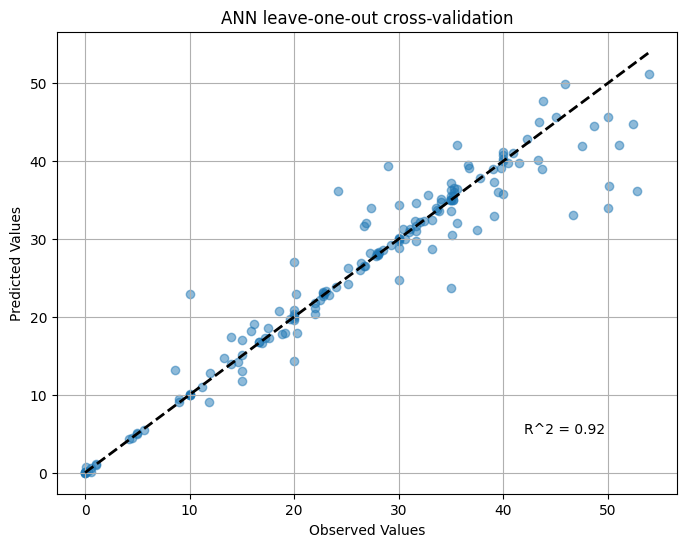

In [128]:
plt.figure(figsize=(8, 6))
plt.scatter(y_t, y_p, alpha=0.5)
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('ANN leave-one-out cross-validation')
plt.plot([y_t.min(), y_t.max()], [y_t.min(), y_t.max()], 'k--', lw=2) # Add a diagonal line
plt.grid(True)
plt.text(42, 5, "R^2 = 0.92", fontdict=None)

In [129]:
plt.savefig('/content/drive/My Drive/CUDA/foam_height_predicted_vs_observed_LOO.png')

<Figure size 640x480 with 0 Axes>